In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df=pd.read_csv("../input/machine-predictive-maintenance-classification/predictive_maintenance.csv")
df = df.drop(["UDI","Product ID"],axis=1)
df.sample(6).style.set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    })

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
6540,M,301.400000,310.700000,1368,63.700000,92,1,Power Failure
6386,L,300.200000,309.700000,1656,34.300000,120,0,No Failure
2511,M,299.000000,308.900000,1526,41.100000,20,0,No Failure
7990,M,301.100000,312.400000,1809,25.100000,126,0,No Failure
5548,L,302.300000,311.800000,1605,35.200000,152,0,No Failure
8651,M,297.400000,308.400000,1564,35.000000,105,0,No Failure


In [6]:
# Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)
df.head()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,25.95,36.45,1551,42.8,0,0,No Failure
1,L,26.05,36.55,1408,46.3,3,0,No Failure
2,L,25.95,36.35,1498,49.4,5,0,No Failure
3,L,26.05,36.45,1433,39.5,7,0,No Failure
4,L,26.05,36.55,1408,40.0,9,0,No Failure


In [7]:
df.describe()

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000


In [8]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
3979,L,30.15,39.15,1439,41.8,96,0,No Failure,9.0
4202,L,30.25,38.85,1555,40.6,205,0,No Failure,8.6
8626,L,25.25,36.05,1402,49.7,41,0,No Failure,10.8
9475,L,26.65,37.45,1523,41.9,165,0,No Failure,10.8
5421,M,30.45,40.15,1566,36.6,46,0,No Failure,9.7


In [9]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [10]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [11]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


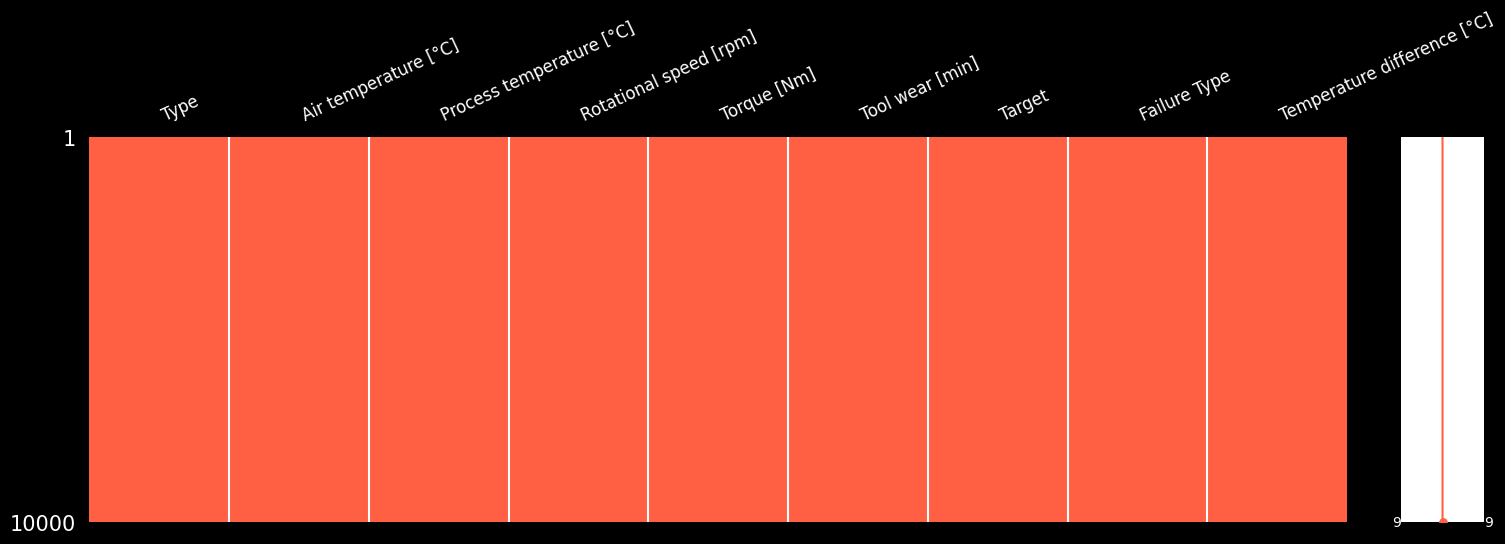

In [12]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

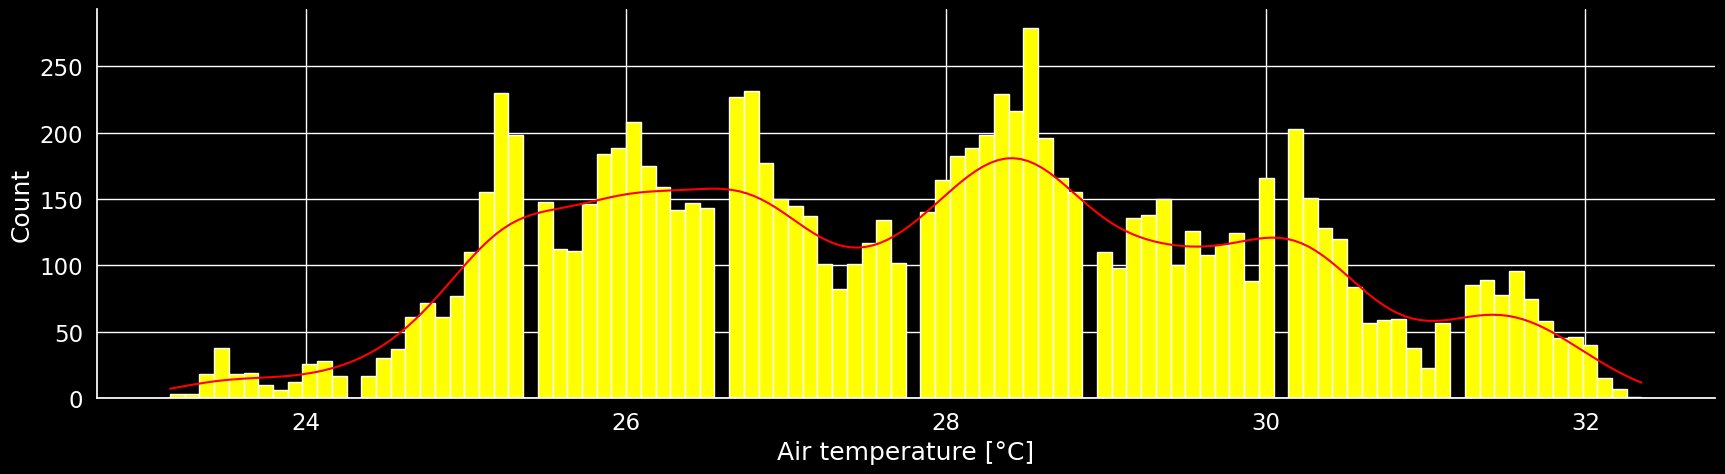

In [13]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,
            color = "red", 
            facecolor = "yellow",
            height = 5, aspect = 3.5);

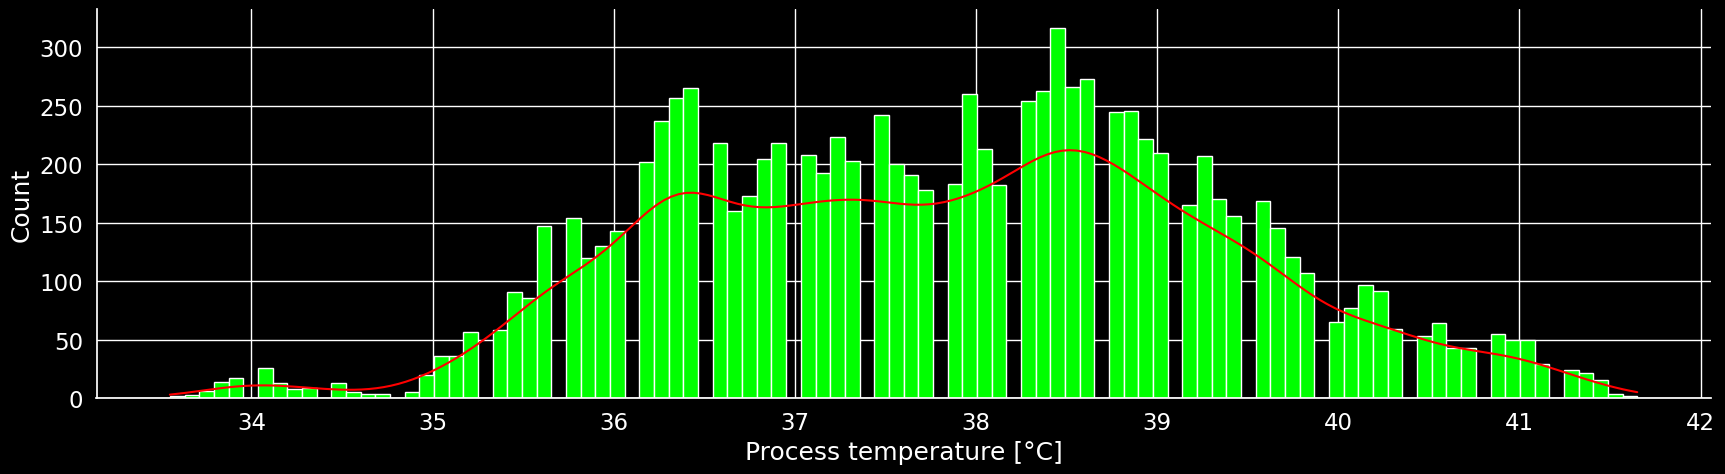

In [14]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", 
            facecolor = "lime",height = 5, aspect = 3.5);

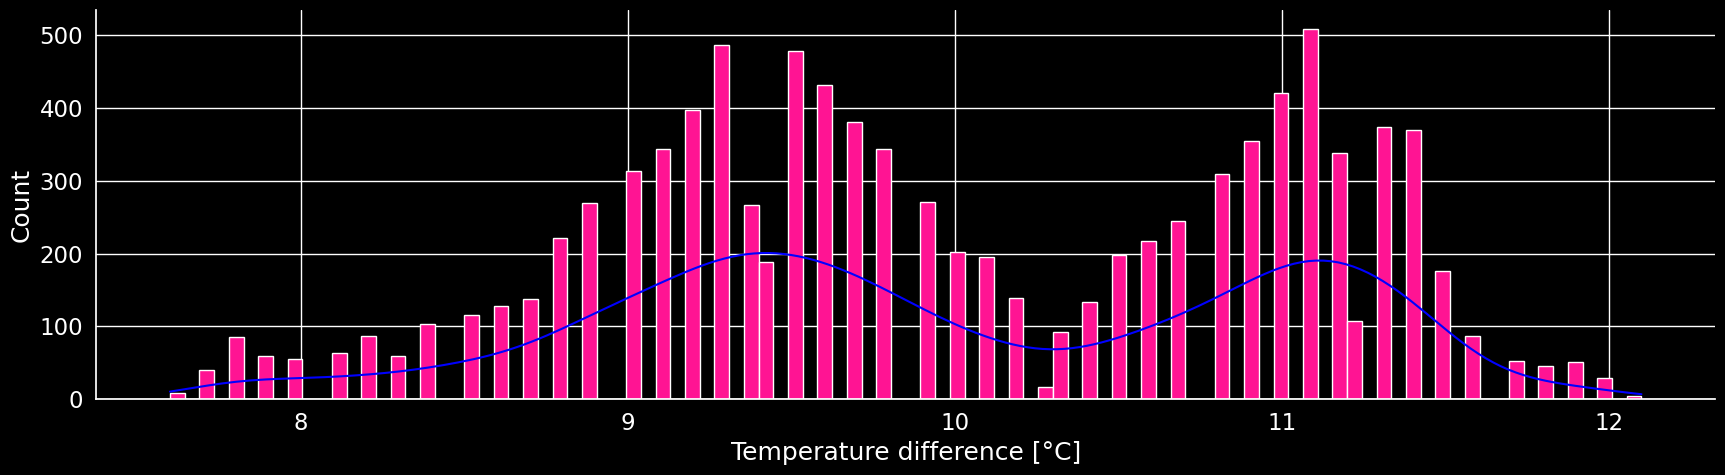

In [15]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", 
            facecolor = "DeepPink", height = 5, aspect = 3.5);

In [16]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8, '\n')

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
******************************** 

Target
0    9661
1     339
Name: count, dtype: int64
******************************** 

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
******************************** 



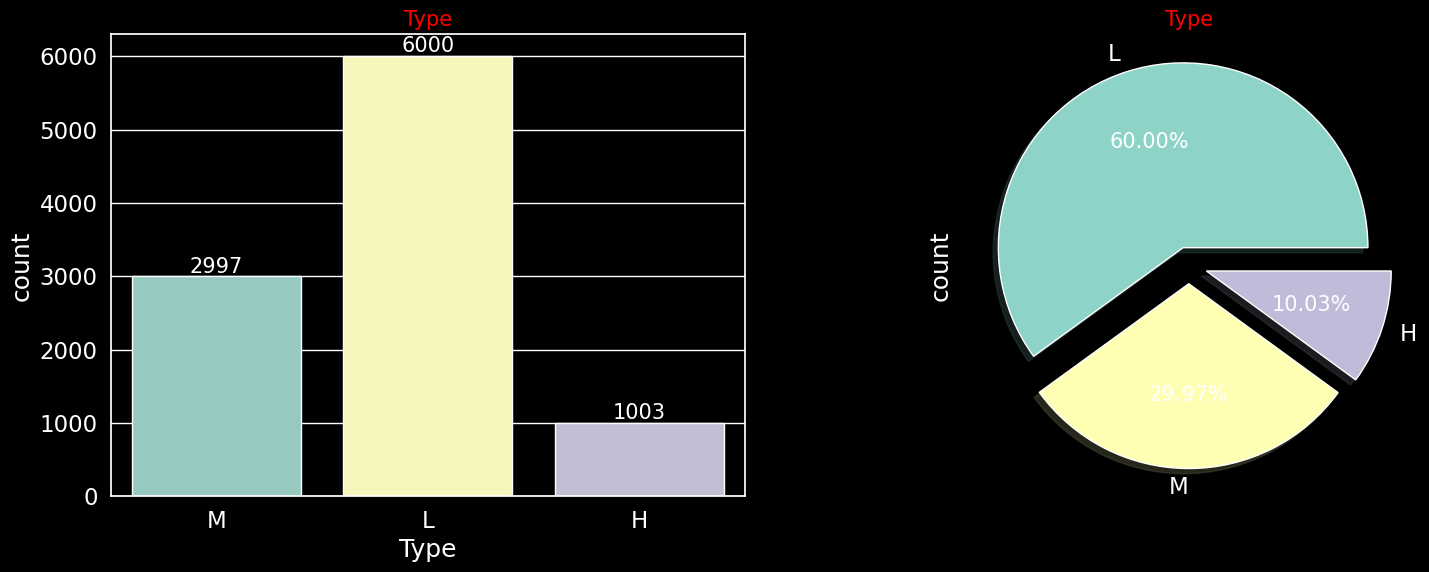

In [17]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

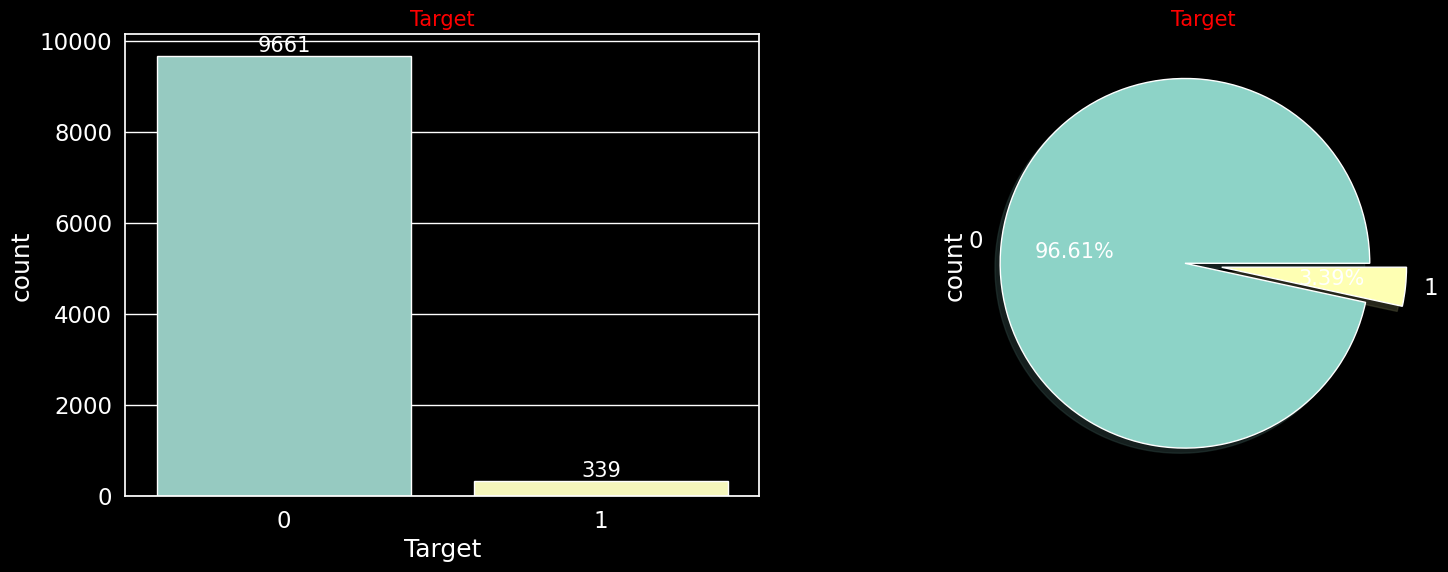

In [18]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

In [19]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


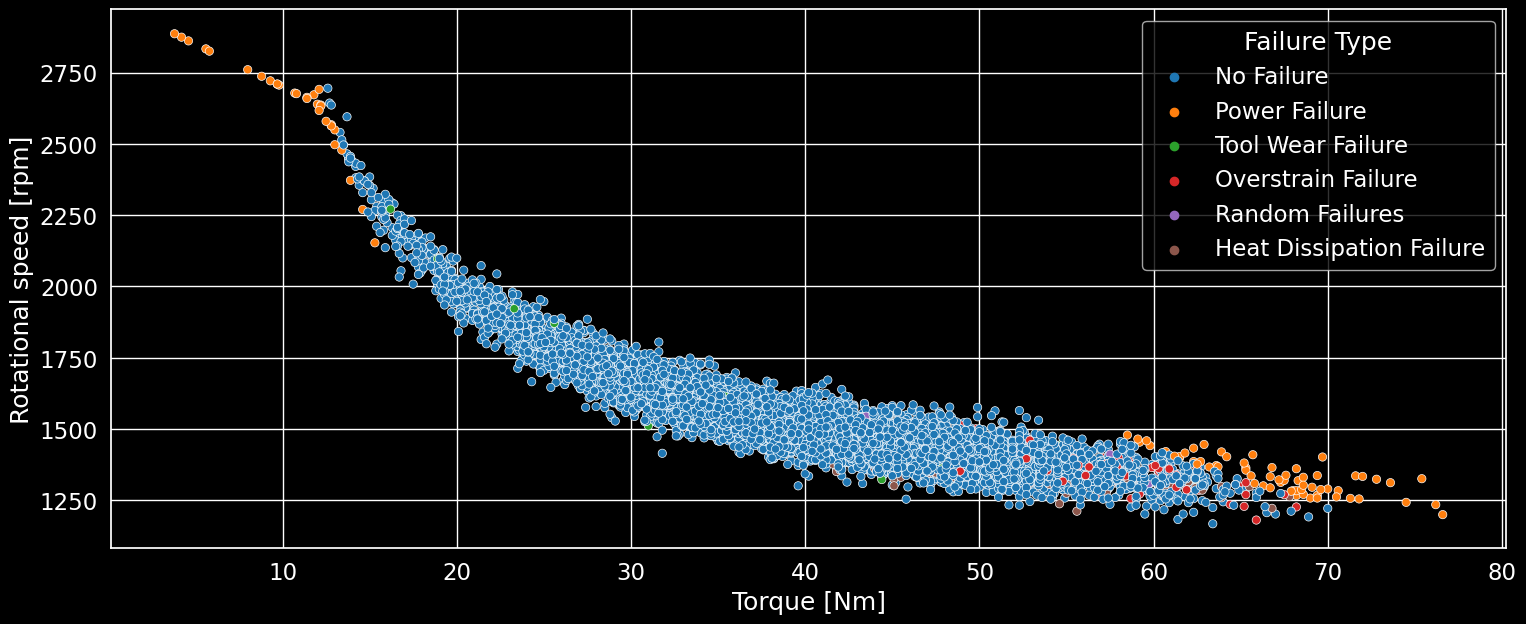

In [20]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

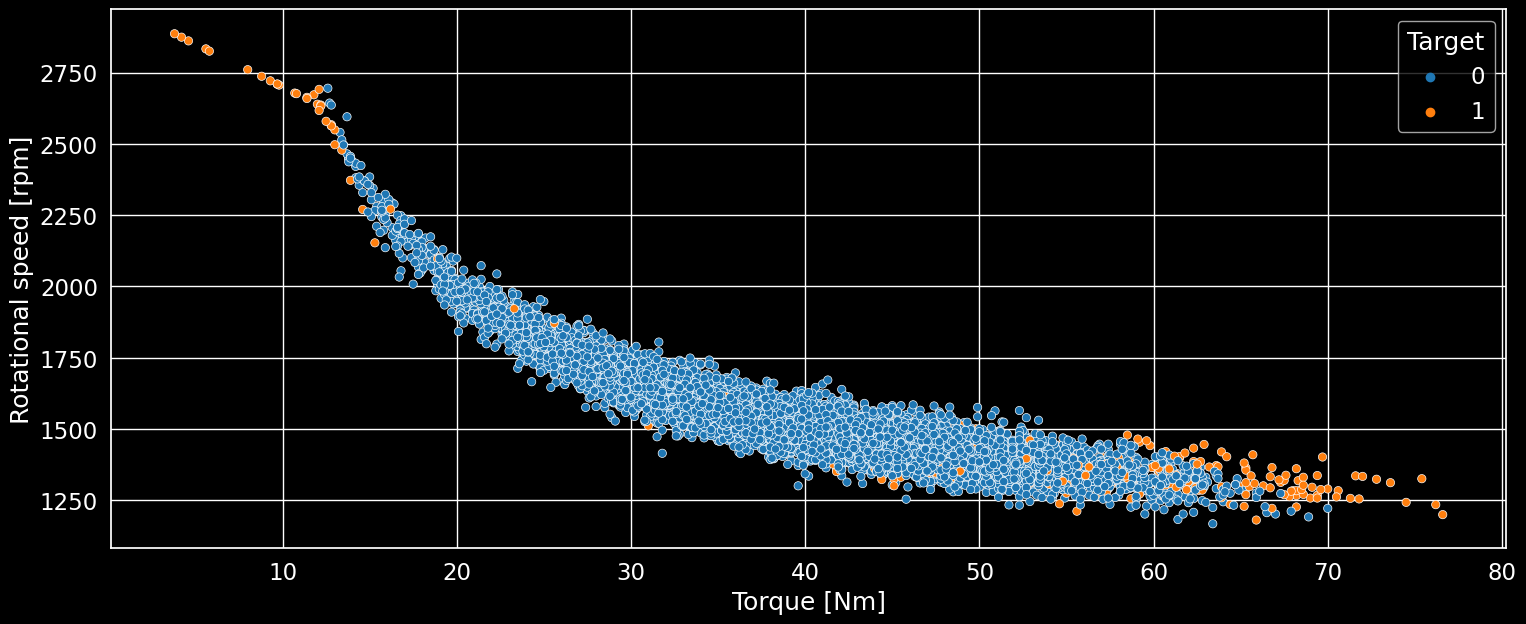

In [21]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

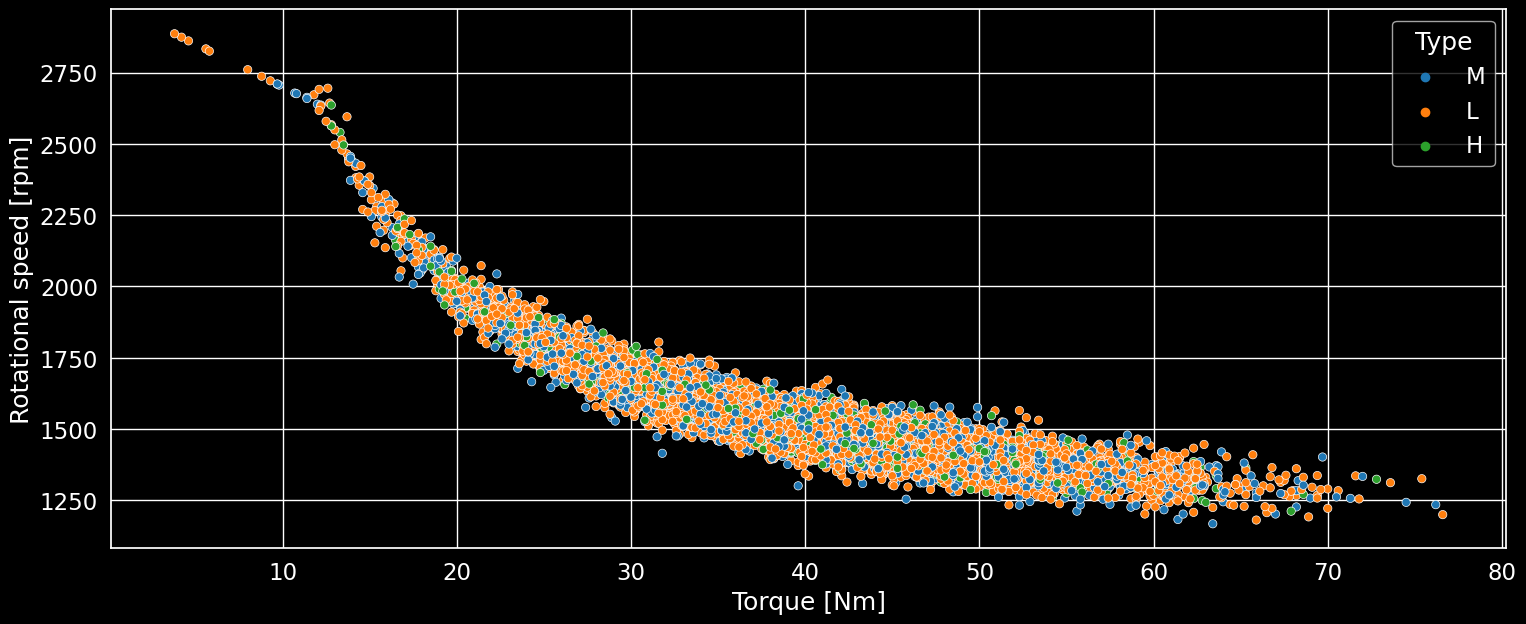

In [22]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type", palette="tab10");

In [23]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


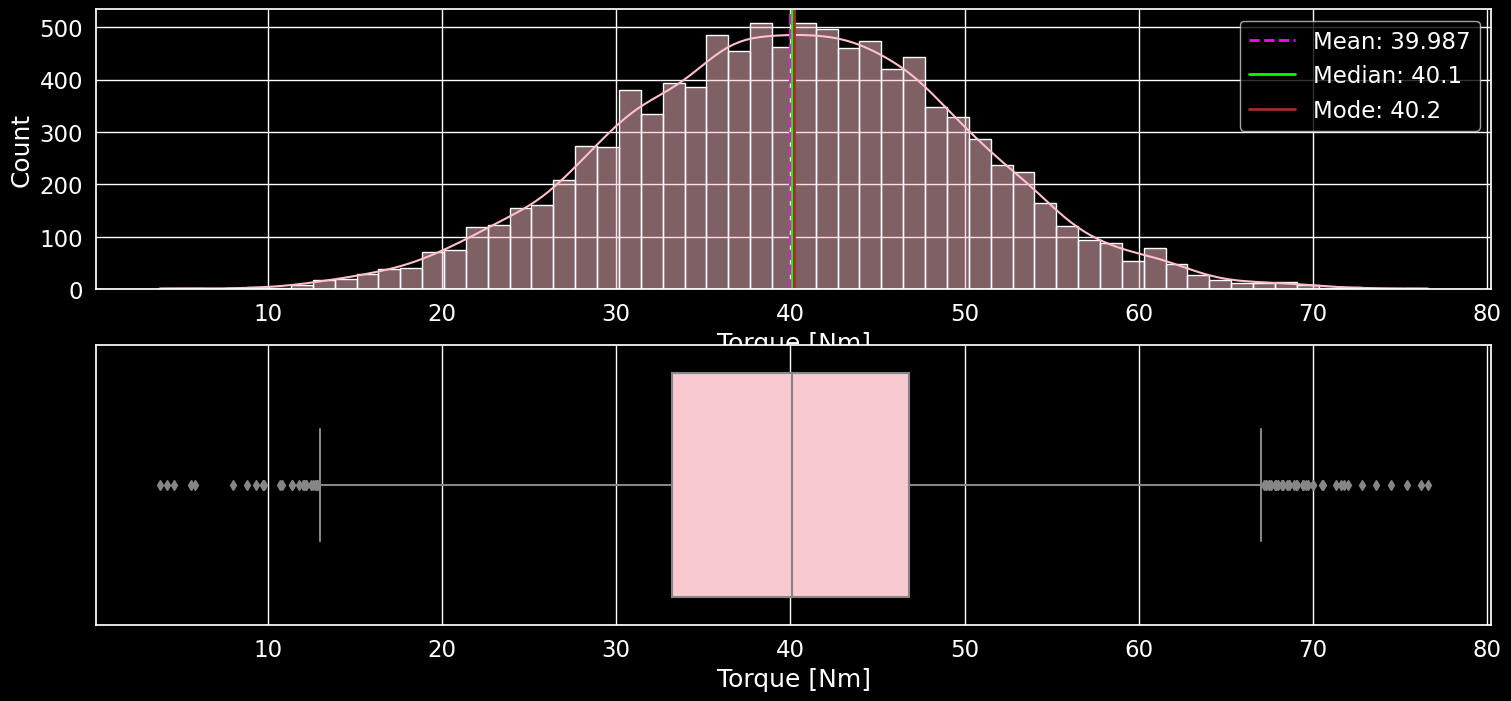

In [24]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', 
                  linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2,
                  label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, 
                  label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='pink')
    
    plt.show()

plot_hist('Torque [Nm]')

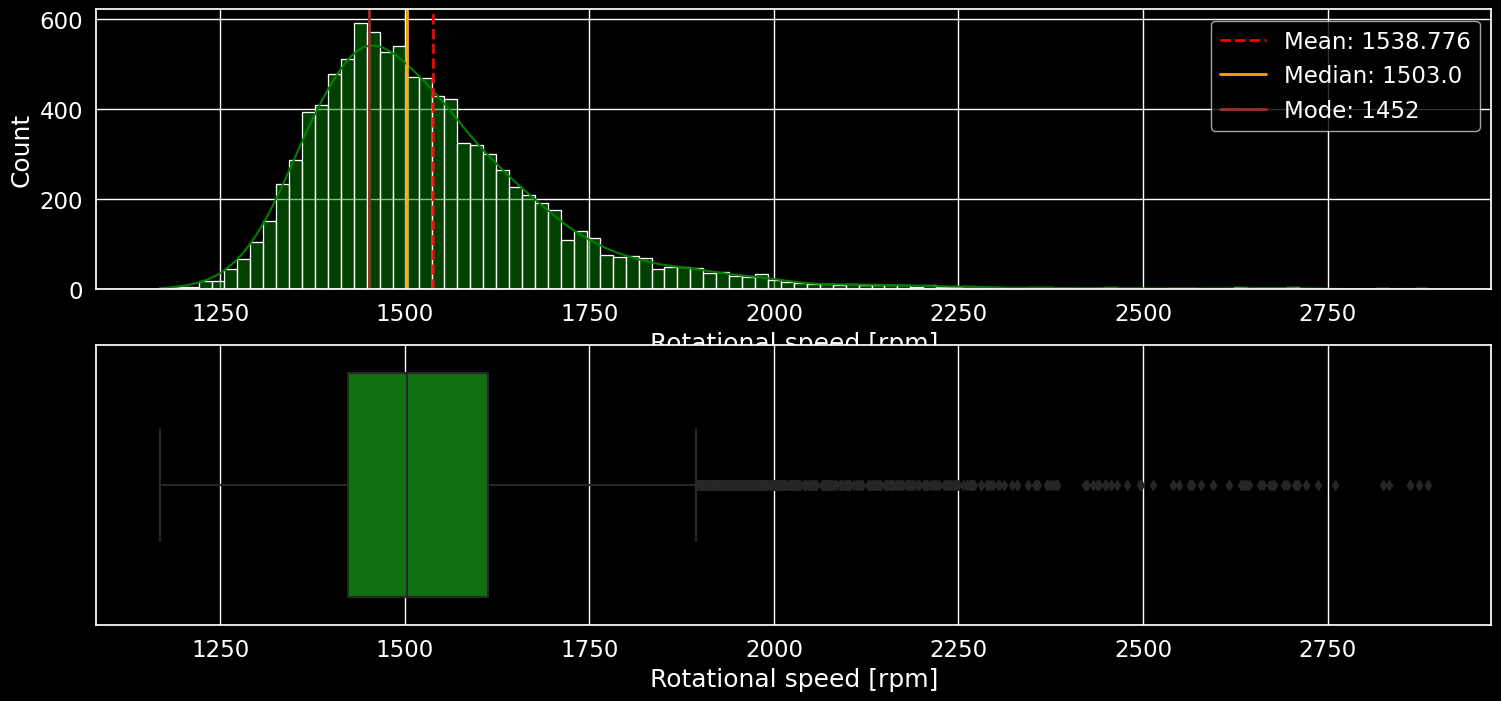

In [25]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))
    
    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, 
                  label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, 
                  label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, 
                  label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()
    
    sns.boxplot(x = df[feature], ax = ax[1],color='green')
    
    plt.show()

plot_hist('Rotational speed [rpm]')

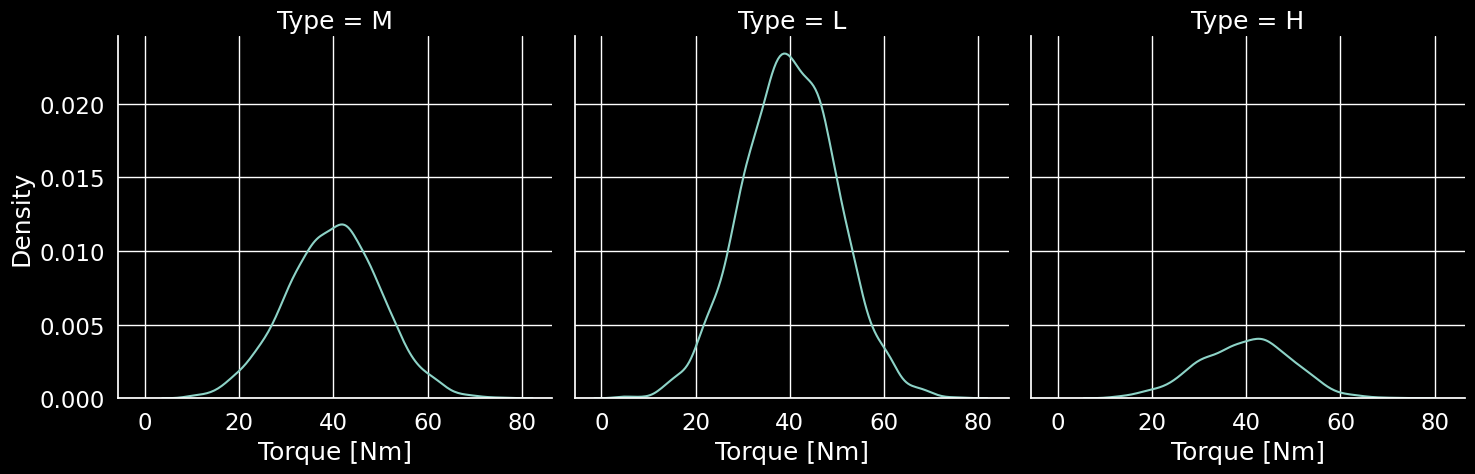

In [26]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

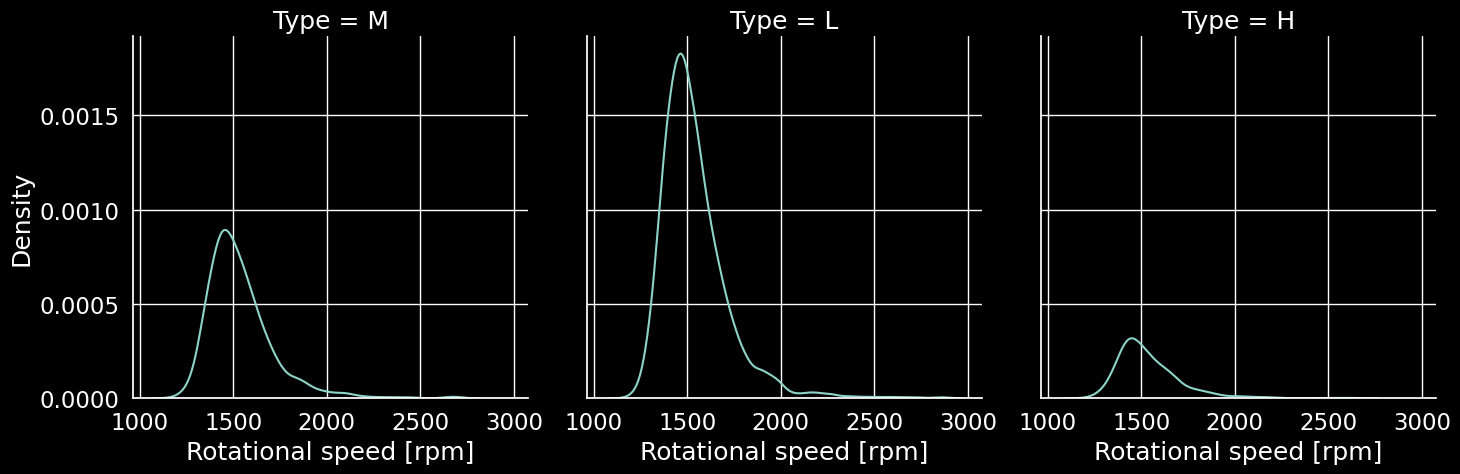

In [27]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

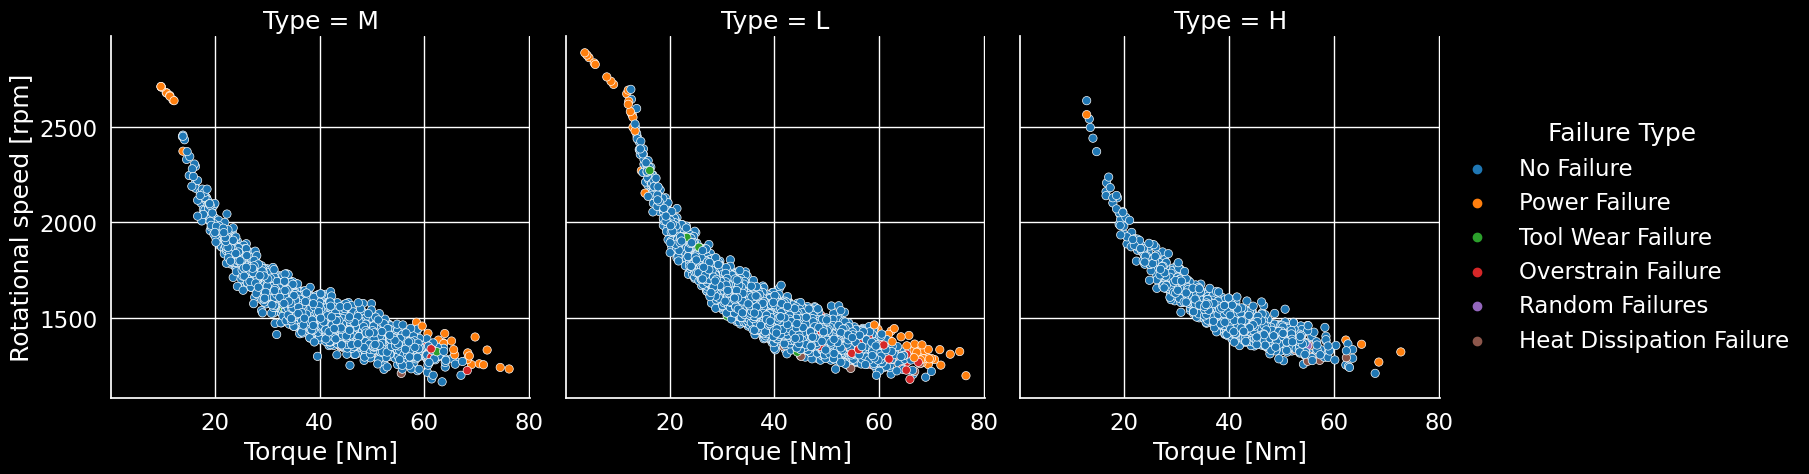

In [28]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",
            col="Type",palette='tab10');

In [29]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


In [30]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [31]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

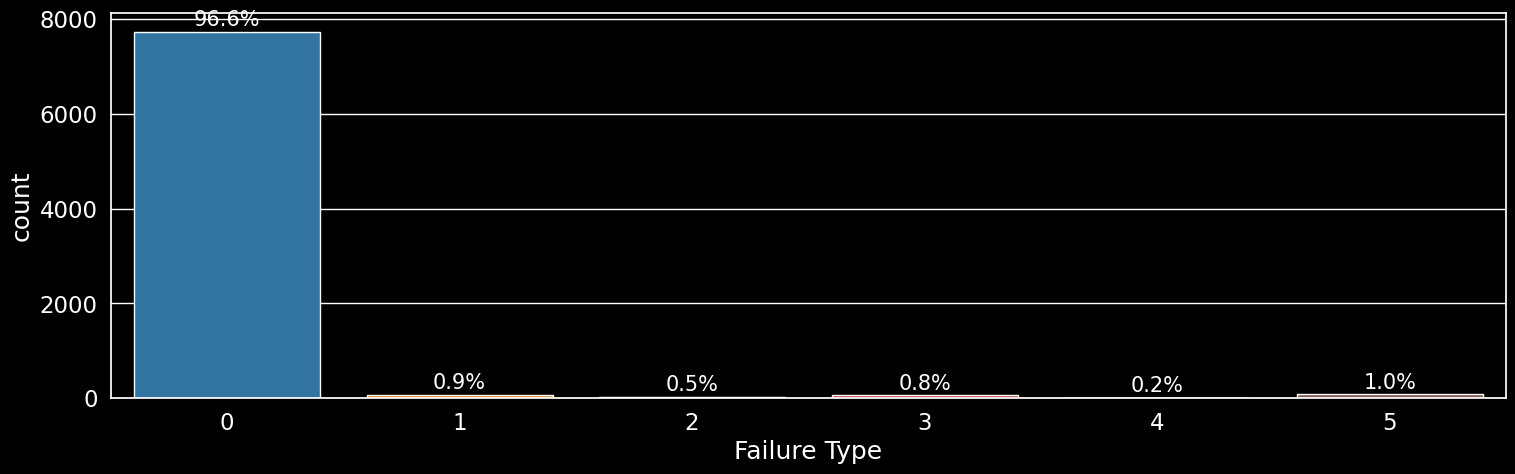

In [33]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

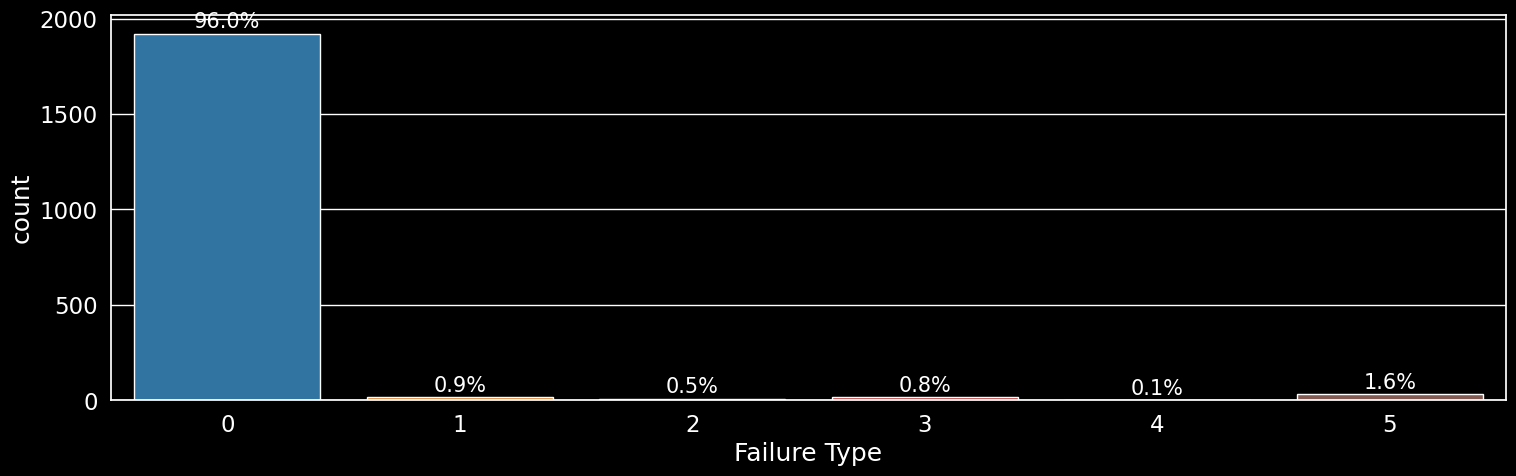

In [34]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [35]:
# from sklearn.metrics import accuracy_score,\
# classification_report #,confusion_matrix,plot_confusion_matrix
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# # sklearn.metrics.ConfusionMatrixDisplay

# # Logistic Regression
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
# y_pred_lr = logreg.predict(X_test)

# log_train = round(logreg.score(X_train, y_train) * 100, 2)
# log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


# print("Training Accuracy    :",log_train ,"%")
# print("Model Accuracy Score :",log_accuracy ,"%")
# print("\033[1m--------------------------------------------------------\033[0m")
# print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
# print("\033[1m--------------------------------------------------------\033[0m")
# plot_confusion_matrix(logreg, X_test, y_test);
# plt.title('Confusion Matrix');

Training Accuracy    : 96.75 %
Model Accuracy Score : 96.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.67      0.38      0.48        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.27      0.23      0.24      2000
weighted avg       0.93      0.96      0.95      2000

--------------------------------------------------------


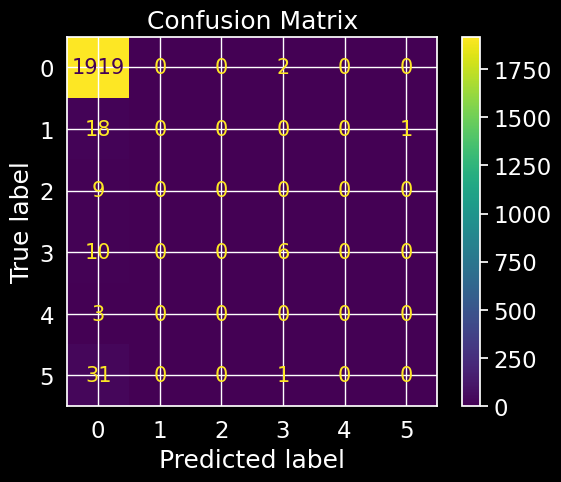

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Confusion Matrix Display
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.85      0.89      0.87        19
           2       0.82      1.00      0.90         9
           3       0.92      0.75      0.83        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           0.99      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.99      0.99      0.99      2000

--------------------------------------------------------


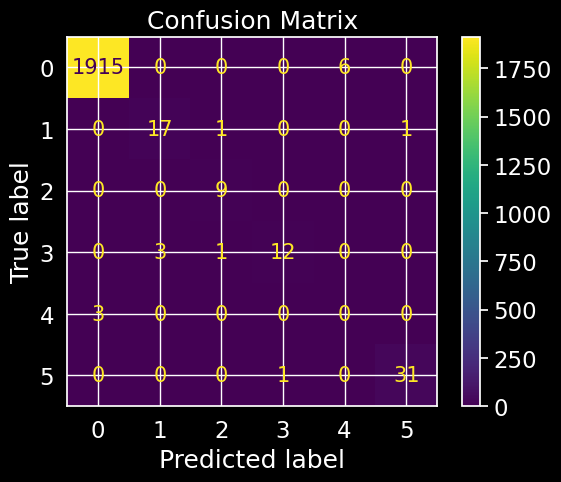

In [37]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.6 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1921
           1       0.90      0.95      0.92        19
           2       1.00      0.78      0.88         9
           3       0.88      0.94      0.91        16
           4       0.00      0.00      0.00         3
           5       0.97      0.97      0.97        32

    accuracy                           1.00      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.99      1.00      1.00      2000

--------------------------------------------------------


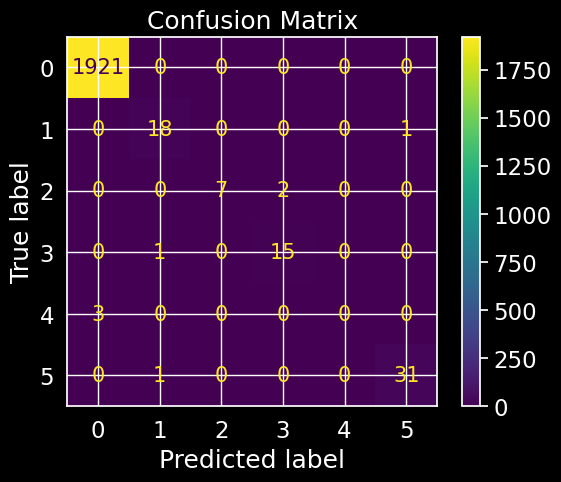

In [38]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
# plot_confusion_matrix(random_forest, X_test, y_test);
# plt.title('Confusion Matrix');

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

Training Accuracy    : 96.64 %
Model Accuracy Score : 96.05 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1921
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00        32

    accuracy                           0.96      2000
   macro avg       0.16      0.17      0.16      2000
weighted avg       0.92      0.96      0.94      2000

--------------------------------------------------------


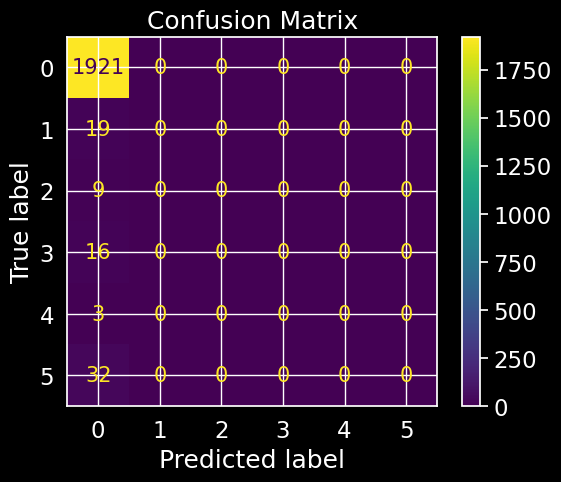

In [39]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
cm = confusion_matrix(y_test, y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [40]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 
        'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, 
     random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, 
        random_forest_accuracy
    ]
})

In [41]:
models

,Model,Training Accuracy,Model Accuracy Score
0,Support Vector Machines,96.75,96.25
1,Logistic Regression,96.64,96.05
2,Random Forest,100.00,99.20
3,Decision Tree,100.00,99.60


In [42]:
prediction1 = random_forest.predict(X_test)
print(prediction1)

[0 0 0 ... 0 0 0]


In [43]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
9666,0,0
2543,0,0
4830,0,0
159,0,0
1905,0,0
